# Analysis of Apple Stock Data 

This project has analysed the stock prices of Apple(AAPL) from past 10 years. It depicts the change in the highs and lows of the stock price in a day and see if there is some pattern to it. The volume purchased has also been taken into account.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Firstly find a suitable dataset from kaggle in csv format according to your interest. This data should have a minimum of 3 columns and 150 rows so that we can derive some meaningful results from it. The dataset can be downloaded using opendatasets python library.

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ayushch
Your Kaggle Key: ········


100%|██████████| 49.5k/49.5k [00:00<00:00, 28.6MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './apple-aapl-historical-stock-data'

In [6]:
import os
os.listdir(data_dir)

['HistoricalQuotes.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "my-apple-stock-project"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushch01ac/my-apple-stock-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushch01ac/my-apple-stock-project


'https://jovian.ai/ayushch01ac/my-apple-stock-project'

## Data Preparation and Cleaning

We will load the dataset into stock_raw using pandas as a dataframe. We will then explore the number of rows, columns



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [11]:
import pandas as pd

In [12]:
stock_raw= pd.read_csv(data_dir + '/HistoricalQuotes.csv')

In [13]:
stock_raw

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


This is the data frame that we will be working with.

In [14]:
stock_raw.shape

(2518, 6)

In [15]:
stock_raw.describe()

,Volume
count,2.518000e+03
mean,7.258009e+07
std,5.663113e+07
min,1.136205e+07
25%,3.053026e+07
50%,5.295469e+07
75%,9.861006e+07
max,4.624423e+08


As only the volume column has integer type value so these operations can only be performed on that column.

In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushch01ac/my-apple-stock-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushch01ac/my-apple-stock-project


'https://jovian.ai/ayushch01ac/my-apple-stock-project'

## Exploratory Analysis and Visualization
 
We will now analyze the data using graphical representation using matplotlib and seaborn library of python and explore relationships between columns and how one value affects the other value. We will also be exploring the distribution of the values and any insights regarding it will be noted.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

The low and stock stock prices of every day are plotted below respectively to see the change accordingly

In [19]:
stock_raw[stock_raw.columns[1:]] = stock_raw[stock_raw.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

We need the values of prices of stock in float type so above line has been used to covert dollars into float type.

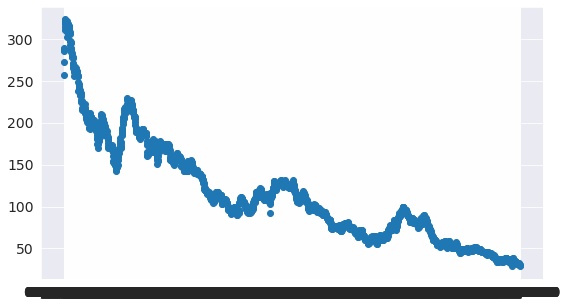

In [20]:
plt.scatter(stock_raw['Date'],stock_raw[' Low'])

As the date starts from year 2020 and ends in 2010, the decreasing graph shows that the apple stock has had an increasing trend over the years excluding some time frames.

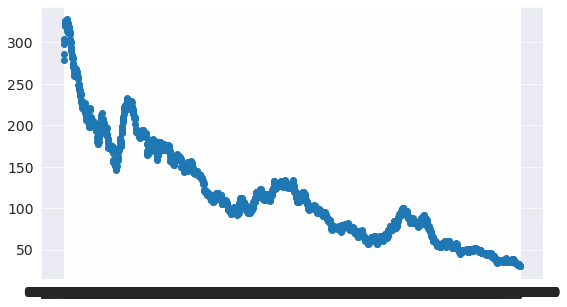

In [21]:
plt.scatter(stock_raw['Date'],stock_raw[' High'])

This graph also confirms our previous conclusion that apple stock has had an increasing trend.

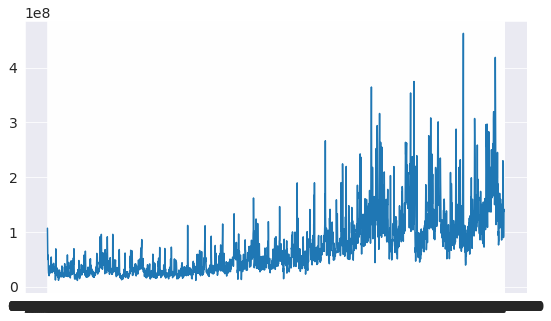

In [22]:
plt.plot(stock_raw['Date'],stock_raw[' Volume'])

The above graph shows the amount of volume traded on each day but dates are not visible as this has a large amount of dates included of 10 years.

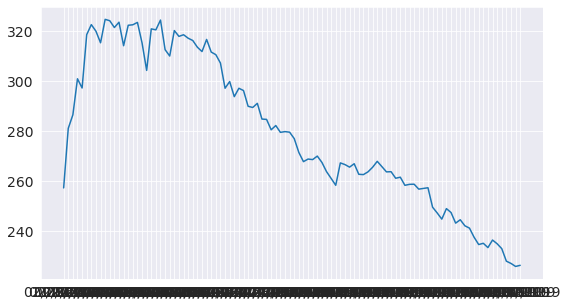

In [23]:
plt.plot(stock_raw['Date'].head(100),stock_raw[' Open'].head(100))

This graph shows the open prices of stocks of the latest 100 dates present in this dataset and it seems that there has been large fluctuations in the prices.

Let us save and upload our work to Jovian before continuing

In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushch01ac/my-apple-stock-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushch01ac/my-apple-stock-project


'https://jovian.ai/ayushch01ac/my-apple-stock-project'

## Asking and Answering Questions

Now, we will answer some questions about this project and what it is doing and what is the pattern behind it if there is any.



#### Q1: What are the 10 days where maximum volume of stocks was traded and their data?

We will be using pandas library's sort values function to answer this question

In [26]:
total_vol = stock_raw.sort_values(" Volume",ascending=False).head(10)

In [27]:
total_vol

,Date,Close/Last,Volume,Open,High,Low
2293,01/18/2011,48.6643,462442329.0,47.0743,49.2518,46.5714
2469,05/07/2010,33.6943,418562326.0,34.8157,35.2243,32.1728
2021,02/15/2012,71.0957,374517892.0,73.4657,75.1843,70.9843
1786,01/24/2013,64.3571,364459099.0,65.7143,66.5328,64.3214
2002,03/14/2012,84.2257,353599156.0,82.5785,84.9600,82.2000
2470,05/06/2010,35.1786,319584886.0,36.2614,36.8928,28.4643
2460,05/20/2010,33.9657,319497456.0,34.5543,34.8357,33.7443
1831,11/16/2012,75.3825,316194785.0,75.0285,75.7143,72.2500
2113,10/04/2011,53.2143,308080802.0,53.5100,54.5428,50.6057
2355,10/19/2010,44.2128,307005952.0,43.3428,44.8243,42.8600


This dataframe clearly shows the 10 days when highest volume of stock was traded from 462442329 (the highest value) to 10th highest value 307005952

#### Q2: What are the highest 20 differences in low and high from this data i.e. highest change or fluctuation of stock prices in a day?

In [34]:
stock_raw

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,273.3600,106721200.0,257.2600,278.4100,256.3700
1,02/27/2020,273.5200,80151380.0,281.1000,286.0000,272.9600
2,02/26/2020,292.6500,49678430.0,286.5300,297.8800,286.5000
3,02/25/2020,288.0800,57668360.0,300.9500,302.5300,286.1300
4,02/24/2020,298.1800,55548830.0,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2513,03/05/2010,31.2786,224647427.0,30.7057,31.3857,30.6614
2514,03/04/2010,30.1014,89591907.0,29.8971,30.1314,29.8043
2515,03/03/2010,29.9043,92846488.0,29.8486,29.9814,29.7057
2516,03/02/2010,29.8357,141486282.0,29.9900,30.1186,29.6771


In [35]:
diff =stock_raw[' High']-stock_raw[' Low']

We now have the difference in values of low and high

In [33]:
diff.sort_values(ascending=False).head(20)

0       22.0400
1136    16.8000
3       16.4000
4       14.9500
19      14.3900
334     13.6000
1       13.0400
81      11.9100
2       11.3800
137     11.3100
145     11.2865
18      11.2700
129     11.0510
295     10.5100
347     10.3000
146     10.0700
5        9.9500
518      9.7200
337      9.6900
684      9.1700
dtype: float64

These are the highest changes in low and high showing the highest variations in stock prices in a day.  

#### Q3:Show the data of stocks 10 days from the beginning of this dataset.

In [36]:
begin_stock = stock_raw.tail(10)

In [37]:
begin_stock

,Date,Close/Last,Volume,Open,High,Low
2508,03/12/2010,32.3714,103841951.0,32.4814,32.5328,32.2500
2509,03/11/2010,32.2143,101209110.0,31.9871,32.2143,31.9028
2510,03/10/2010,32.1200,148907755.0,31.9757,32.2114,31.8857
2511,03/09/2010,31.8600,229908139.0,31.1871,32.1428,31.1271
2512,03/08/2010,31.2971,107326832.0,31.4300,31.4414,31.1786
2513,03/05/2010,31.2786,224647427.0,30.7057,31.3857,30.6614
2514,03/04/2010,30.1014,89591907.0,29.8971,30.1314,29.8043
2515,03/03/2010,29.9043,92846488.0,29.8486,29.9814,29.7057
2516,03/02/2010,29.8357,141486282.0,29.9900,30.1186,29.6771
2517,03/01/2010,29.8557,137312041.0,29.3928,29.9286,29.3500


These are the bottom most values of the dataframe found using tail function.

#### Q4: Show the data of stocks of where open value is greater than 300.

In [63]:
greater_stock = stock_raw[' Open']>=300

In [69]:
c = 0
for i in greater_stock:
    if i == True:
        print(stock_raw.iloc[c])
    else:
        continue
    c+=1

Date            02/28/2020
 Close/Last         273.36
 Volume        106721200.0
 Open               257.26
 High               278.41
 Low                256.37
Name: 0, dtype: object
Date           02/27/2020
 Close/Last        273.52
 Volume        80151380.0
 Open               281.1
 High               286.0
 Low               272.96
Name: 1, dtype: object
Date           02/26/2020
 Close/Last        292.65
 Volume        49678430.0
 Open              286.53
 High              297.88
 Low                286.5
Name: 2, dtype: object
Date           02/25/2020
 Close/Last        288.08
 Volume        57668360.0
 Open              300.95
 High              302.53
 Low               286.13
Name: 3, dtype: object
Date           02/24/2020
 Close/Last        298.18
 Volume        55548830.0
 Open              297.26
 High              304.18
 Low               289.23
Name: 4, dtype: object
Date           02/21/2020
 Close/Last        313.05
 Volume        32426420.0
 Open              31

This is the data where the open value of share has been higher than 300 on a day to day basis.

#### Q5: Show the close values of stock every day and draw conclusion from it.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel=' Close/Last'>

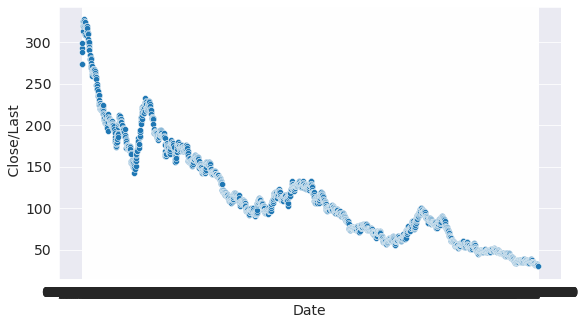

In [70]:
sns.scatterplot(stock_raw['Date'],stock_raw[' Close/Last'])

As the date starts from year 2020 and ends in 2010, the decreasing graph shows that the apple stock has had an increasing trend over the years excluding some time frames. The close value of stock has almost always been on the rise as the data is in reverse data format thats why it shows a decreasing trend.

Let us save and upload our work to Jovian before continuing.

In [71]:
import jovian

In [72]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushch01ac/my-apple-stock-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushch01ac/my-apple-stock-project


'https://jovian.ai/ayushch01ac/my-apple-stock-project'

## Inferences and Conclusion

We took the Apple Stock Data from Kaggle and analyzed the data using pandas, matplotlib and seaborn. We plotted various graphs and sorted many values and a conclusion can be drawn that a buy of apple stock has bee worth it for the investors and they can continue to buy it in the future.

In [73]:
import jovian

In [74]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushch01ac/my-apple-stock-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ayushch01ac/my-apple-stock-project


'https://jovian.ai/ayushch01ac/my-apple-stock-project'

## References and Future Work
References:
The dataset has been taken from Kaggle and the instructions required to perform analysis have been learnt by studying from jovian.ai course Data Analysis: Zero to Pandas.
Future work:
This project can be updated using a present dataset which provides the values of stock data after 2020. More information can be added into the dataset like if there was some major apple event at the day of exponential stock price increase etc. 

In [75]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>